<a href="https://colab.research.google.com/github/sevdaimany/Computer_Vision_Projects/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Masterclass - Face recognition

## OpenCV

### Loading the dataset

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [1]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file = path, mode= 'r')
zip_object.extractall('./')
zip_object.close()

### Pre-processing the images

In [3]:
import os
# print(os.listdir('/content/yalefaces/train'))

In [4]:
# go through each one of train folder images and puts them in the needed 
# formats in order to send them to the algorithm.
def get_image_data():
  # paths have the complete path name for each of the images
  paths = [os.path.join('/content/yalefaces/train' , f) for f in os.listdir('/content/yalefaces/train')]
  # print(paths) 
  faces = []
  ids = []
  for path in paths:
    # L mode image: means it is a single channel image which is interpreted as a grayscale image
    # in other words, it is converting from coller image to grayscale image
    image = Image.open(path).convert('L') 
    # print(type(image))
    # -------convert to numpy array
    # uint8 : each pixel of the image is integer value 
    image_np = np.array(image , 'uint8')
    # --------getting id of each image 
    id = int(os.path.split(path)[1].split('.')[0].replace('subject',''))
    # print(id)
    ids.append(id)
    faces.append(image_np)
  
  return np.array(ids), faces



In [5]:
ids, faces = get_image_data()

In [6]:
  ids

array([ 1, 10,  7,  5,  1,  9,  9, 10,  4,  5,  1,  4,  1,  5, 13, 10,  9,
        3, 14,  2,  5,  4, 13,  6,  5, 12,  7, 10,  3, 10, 11, 13,  8, 10,
       10, 15,  4, 12, 11, 11,  2,  1, 12,  5,  9, 13, 15, 11,  8, 14, 12,
       13, 11,  7,  7, 12,  2, 15, 15,  7, 11,  7, 10,  6,  2,  1,  3,  9,
       10,  4,  7,  5, 14, 15, 14, 13,  3, 12,  2, 14,  9,  1, 12,  4,  5,
       15, 13,  8,  3,  6,  8, 11,  2,  8, 15, 13,  7,  8,  6,  3,  3,  6,
        8,  9,  2,  6, 11,  1,  3,  8, 15, 14, 14,  3, 12, 14,  7,  1,  5,
        6,  9,  9,  2,  6,  4,  8, 15, 11,  4, 14, 13, 12,  4,  6,  2])

In [7]:
len(ids)

135

In [8]:
len(faces)

135

In [9]:
faces[0], faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8), (243, 320))

In [10]:
243 * 320

77760

### Training the LBPH classifier

In [11]:
8 * 8

64

In [12]:
# Default parameters
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8 / rows
# grid_y: 8 / columns

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=9, neighbors=10, grid_x = 12, 
                                                     grid_y = 12)
lbph_classifier.train(faces, ids)
# 8*8 histogram for which image
# save the classifier and histograms in .yml
lbph_classifier.write('lbph_classifier.yml')

### Recognizing faces

In [13]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [14]:
test_image = '/content/yalefaces/test/subject10.sad.gif'

In [15]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np


array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [16]:
image_np.shape

(243, 320)

In [17]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 44.44484693134623)

In [18]:
prediction[0]

10

In [19]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

10

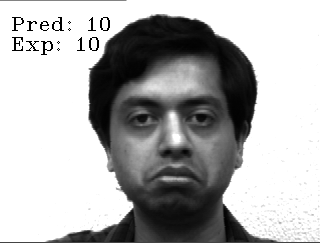

In [20]:
cv2.putText(image_np, 'Pred: '+ str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2.putText(image_np, 'Exp: '+ str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(image_np)

### Evaluating the face classifier

In [21]:
predictions = []
expected_outputs = []

paths = [os.path.join('/content/yalefaces/test' , f) for f in os.listdir('/content/yalefaces/test')]

for path in paths:
  test_image = Image.open(path).convert('L')
  image_np = np.array(test_image, 'uint8')

  prediction, _ = lbph_face_classifier.predict(image_np)

  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [22]:
type(predictions)

list

In [23]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [24]:
type(predictions)

numpy.ndarray

In [25]:
predictions

array([ 4,  3, 12,  5,  4,  3, 15, 10,  5,  1, 11,  4, 11,  7, 14,  2,  9,
       14,  7,  6,  9, 13, 13,  7,  8, 12,  1,  4, 14,  4])

In [26]:
expected_outputs

array([10,  3, 12,  5,  8,  3, 15, 10,  5,  1, 11,  4, 11,  7, 14,  2,  7,
       14, 15,  6,  9, 13, 13,  9,  8, 12,  1,  2,  6,  4])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.7666666666666667

In [28]:
 len(predictions)

30

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs, predictions)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

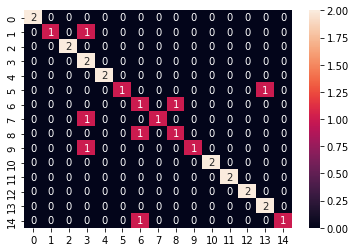

In [30]:
import seaborn
seaborn.heatmap(cm, annot=True);

## Dlib

In [31]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

### Detecting facial points

In [32]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')

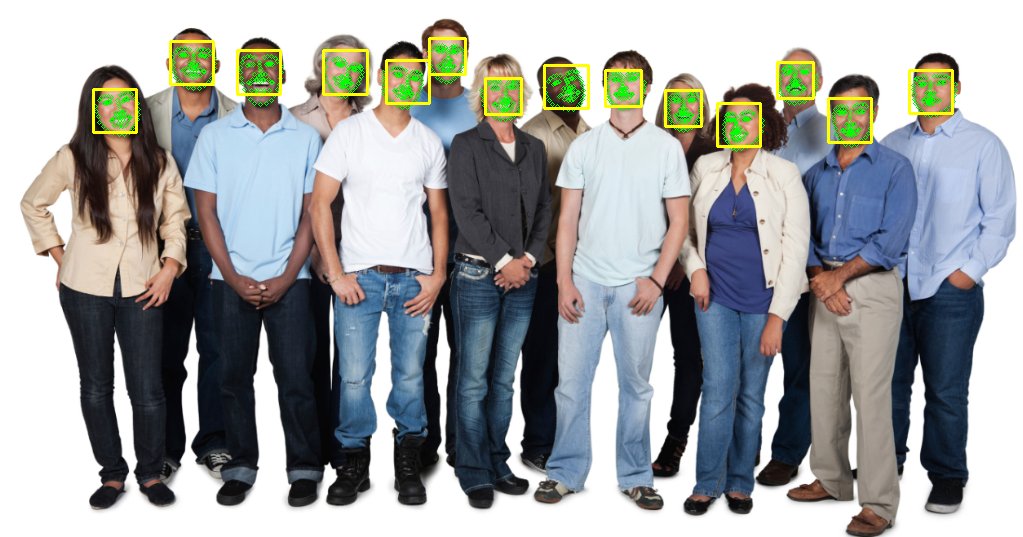

In [33]:
image = cv2.imread('/content/drive/MyDrive/Computer Vision Masterclass/Images/people2.jpg')
face_detection = face_detector(image, 1)
for face in face_detection:
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0,255,0), 1)

  #print(points.parts())
  #print(len(points.parts()))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0,255,255), 2)
cv2_imshow(image)

### Detecting facial descriptors

In [34]:
import os

In [35]:
# Resnet: https://arxiv.org/abs/1512.03385
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat')

In [36]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  #print(path)
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l, t), (r, b), (0, 0, 255), 2)

    points = points_detector(image_np, face)
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0, 255, 0), 1)

    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    #print(type(face_descriptor))
    #print(len(face_descriptor))
    #print(face_descriptor)
    face_descriptor = [f for f in face_descriptor]
    #print(face_descriptor)
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    #print(face_descriptor)
    #print(face_descriptor.shape)
    face_descriptor = face_descriptor[np.newaxis, :]
    #print(face_descriptor.shape)
    #print(face_descriptor)

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)

    index[idx] = path
    idx += 1
  #cv2_imshow(image_np)

In [37]:
face_descriptors.shape

(132, 128)

In [38]:
face_descriptors

array([[-0.14791989,  0.16302286, -0.01365527, ..., -0.04130843,
         0.02652285,  0.04036879],
       [-0.1257561 ,  0.05232358,  0.12975329, ..., -0.01692474,
         0.14553201,  0.09962083],
       [-0.13317487,  0.02902666,  0.03295896, ...,  0.02070309,
         0.06136055,  0.07010035],
       ...,
       [-0.13023351,  0.07850327,  0.06896677, ..., -0.05234056,
         0.14036751, -0.00443998],
       [-0.11659597,  0.07639782,  0.05167833, ..., -0.00875328,
         0.02409001,  0.04955686],
       [-0.15609427,  0.03841993, -0.03720895, ...,  0.01398915,
         0.06041748,  0.03810378]])

In [39]:
len(index)

132

In [40]:
index

{0: '/content/yalefaces/train/subject01.noglasses.gif',
 1: '/content/yalefaces/train/subject10.glasses.gif',
 2: '/content/yalefaces/train/subject07.surprised.gif',
 3: '/content/yalefaces/train/subject05.centerlight.gif',
 4: '/content/yalefaces/train/subject01.normal.gif',
 5: '/content/yalefaces/train/subject09.noglasses.gif',
 6: '/content/yalefaces/train/subject09.wink.gif',
 7: '/content/yalefaces/train/subject10.surprised.gif',
 8: '/content/yalefaces/train/subject04.centerlight.gif',
 9: '/content/yalefaces/train/subject05.sad.gif',
 10: '/content/yalefaces/train/subject01.wink.gif',
 11: '/content/yalefaces/train/subject04.normal.gif',
 12: '/content/yalefaces/train/subject01.glasses.gif',
 13: '/content/yalefaces/train/subject05.leftlight.gif',
 14: '/content/yalefaces/train/subject13.noglasses.gif',
 15: '/content/yalefaces/train/subject10.normal.gif',
 16: '/content/yalefaces/train/subject09.sleepy.gif',
 17: '/content/yalefaces/train/subject03.rightlight.gif',
 18: '/cont

### Calculating the distance between faces

In [41]:
face_descriptors[131]

array([-0.15609427,  0.03841993, -0.03720895, -0.0549495 , -0.12472055,
       -0.05551589,  0.06725857, -0.07827509,  0.19723506,  0.04117513,
        0.20261469, -0.04392371, -0.28930718, -0.0210334 , -0.06295292,
        0.10750207, -0.11645211,  0.03711762, -0.13701522, -0.14689495,
        0.09030086,  0.03934519,  0.0621435 ,  0.02516914, -0.13278648,
       -0.27989703, -0.11451153, -0.08852035, -0.01103349, -0.11004413,
        0.03728481,  0.14857154, -0.21887256, -0.12217433, -0.02111245,
        0.05251542, -0.06196763, -0.02140842,  0.12665442,  0.05811311,
       -0.0846854 ,  0.08034164,  0.13072199,  0.21806994,  0.17812058,
        0.09203841,  0.00925115, -0.04817731,  0.05345964, -0.20261884,
        0.03279707,  0.12275492,  0.08046464,  0.04064565,  0.09810081,
       -0.15315956,  0.01278418,  0.04102629, -0.21536738,  0.09748588,
        0.10074868, -0.07229377, -0.09620038, -0.02539523,  0.15259813,
        0.10091789, -0.12093995, -0.07803941,  0.12858263, -0.13

In [42]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm
np.linalg.norm(face_descriptors[131] - face_descriptors[131])

0.0

In [43]:
np.linalg.norm(face_descriptors[131] - face_descriptors[130])

0.7728412742959127

In [44]:
np.linalg.norm(face_descriptors[131] - face_descriptors[129])

0.840296845411322

In [45]:
np.linalg.norm(face_descriptors[131] - face_descriptors[128])

0.6022392950088329

In [46]:
np.linalg.norm(face_descriptors[0] - face_descriptors, axis = 1)

array([0.        , 0.86318018, 0.85207875, 0.71839144, 0.2747854 ,
       0.78413596, 0.81868287, 0.85306573, 0.90686023, 0.75729102,
       0.45963131, 0.83056445, 0.42630831, 0.77539784, 0.77603966,
       0.88352472, 0.79223584, 0.79529375, 0.8119508 , 0.67845034,
       0.77913941, 0.79390921, 0.80837721, 0.74214306, 0.78427245,
       0.73846785, 0.87037353, 0.89899863, 0.76254565, 0.91216887,
       0.62874584, 0.86486715, 0.85843967, 0.89869301, 0.88934037,
       0.7384982 , 0.86729845, 0.71053729, 0.6459335 , 0.74533883,
       0.67158407, 0.37105848, 0.76819045, 0.80693456, 0.78413596,
       0.69432961, 0.73161503, 0.61834201, 0.79297967, 0.82508821,
       0.78269408, 0.79189675, 0.86554456, 0.86664593, 0.75166844,
       0.70165373, 0.79889026, 0.82111942, 0.87508391, 0.66536914,
       0.79266895, 0.9101848 , 0.75130984, 0.74703785, 0.43888248,
       0.7908203 , 0.80229655, 0.94249378, 0.83056445, 0.80714597,
       0.71964168, 0.86734497, 0.73696083, 0.86289614, 0.84961

In [47]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1))

3

In [48]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)[91]

0.8280993465444296

### Detecting faces with Dlib

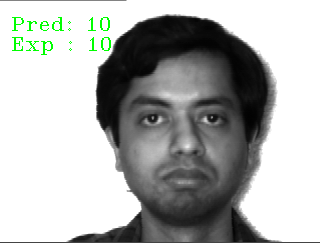

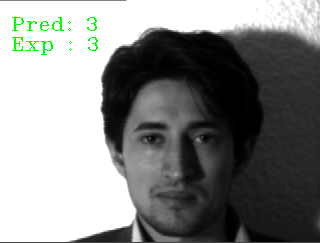

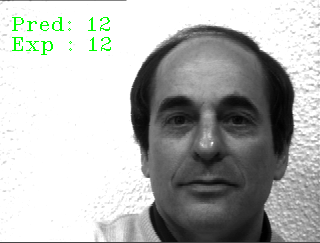

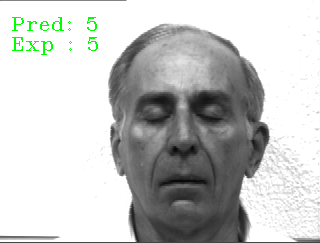

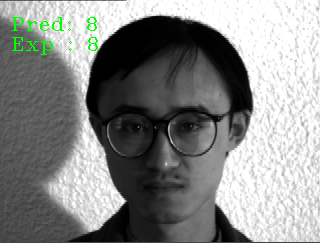

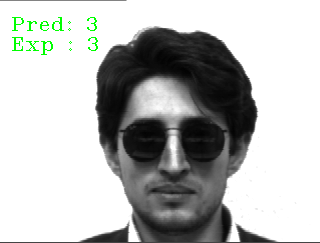

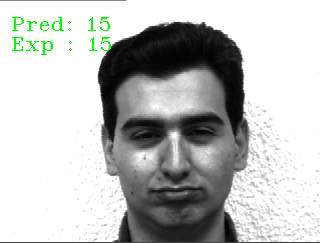

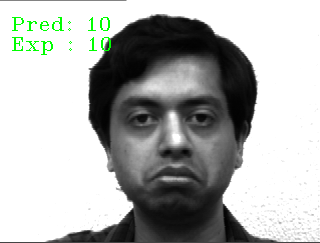

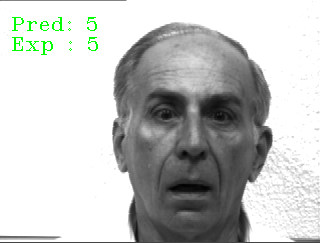

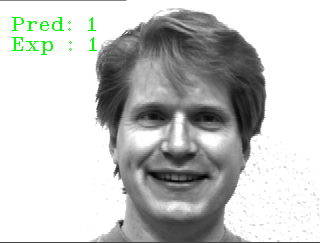

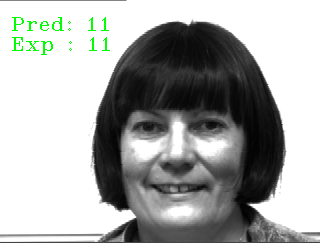

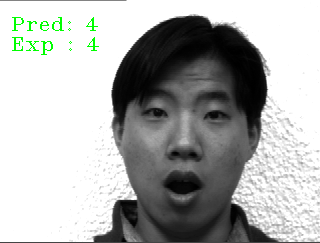

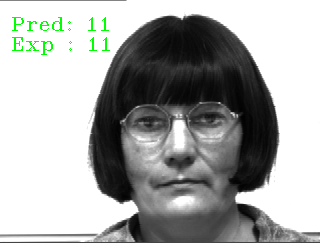

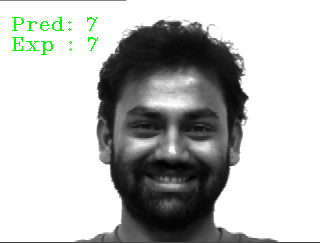

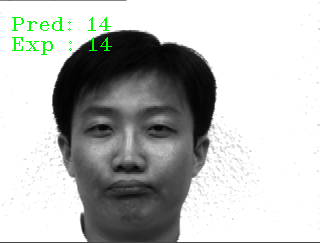

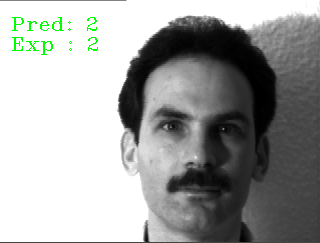

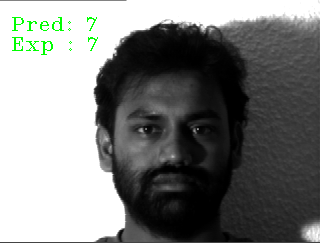

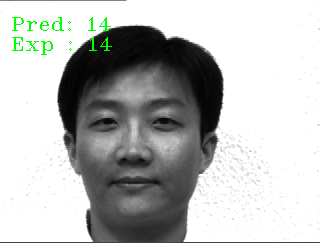

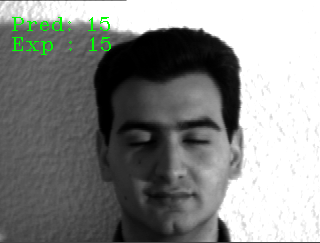

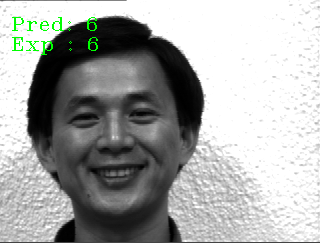

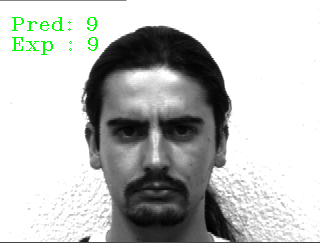

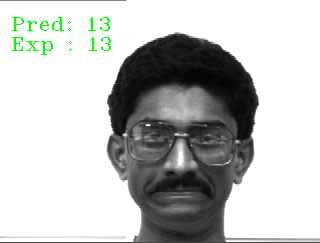

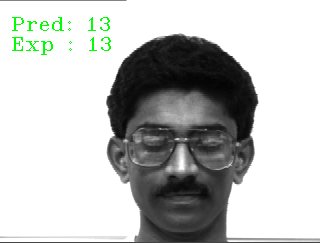

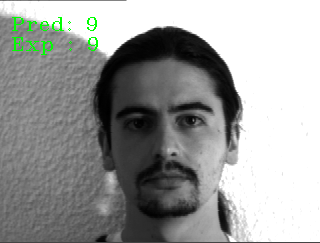

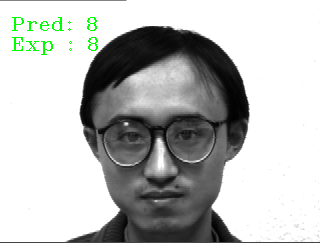

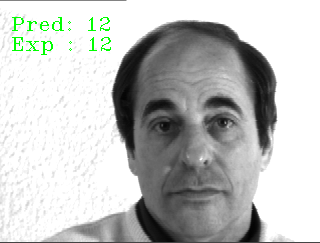

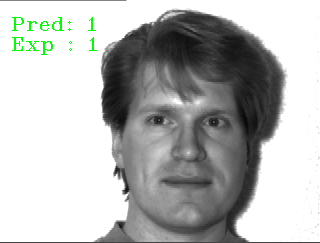

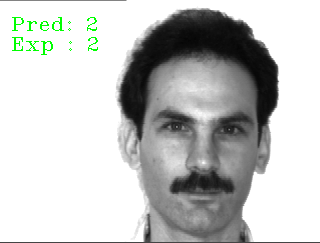

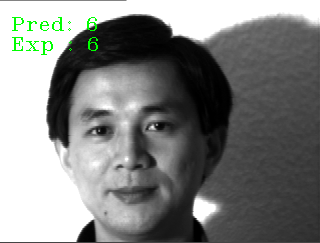

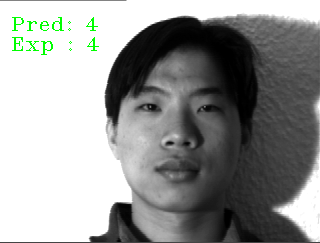

In [49]:
threshold = 0.5
predictions = []
expected_outputs = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
    else:
      name_pred = 'Not identified'

    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(image_np, 'Exp : ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))


  cv2_imshow(image_np)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [50]:
predictions

array([10,  3, 12,  5,  8,  3, 15, 10,  5,  1, 11,  4, 11,  7, 14,  2,  7,
       14, 15,  6,  9, 13, 13,  9,  8, 12,  1,  2,  6,  4])

In [51]:
expected_outputs

array([10,  3, 12,  5,  8,  3, 15, 10,  5,  1, 11,  4, 11,  7, 14,  2,  7,
       14, 15,  6,  9, 13, 13,  9,  8, 12,  1,  2,  6,  4])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

1.0

## Homework

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import zipfile
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/jones_gabriel.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [56]:
def get_image_data():
  paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])
    
    ids.append(id)
    faces.append(image_np)
  
  return np.array(ids), faces

In [57]:
ids, faces = get_image_data()

In [58]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [59]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [60]:
image = Image.open('/content/jones_gabriel/person.1.1.jpg')
image.size

(220, 220)

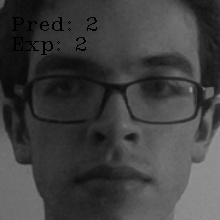

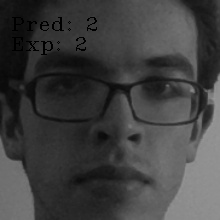

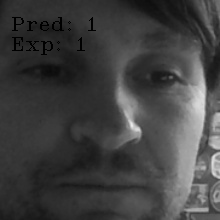

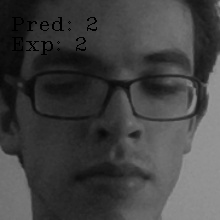

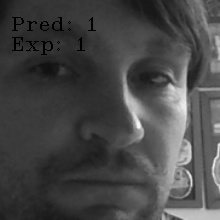

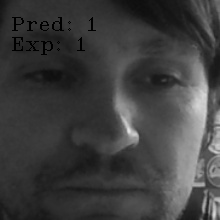

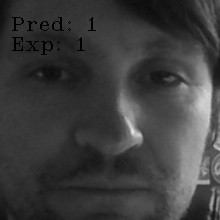

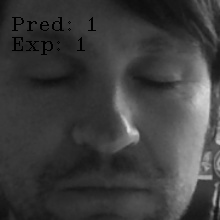

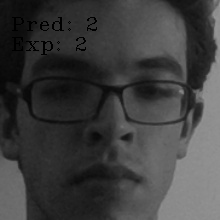

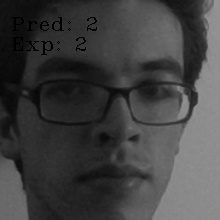

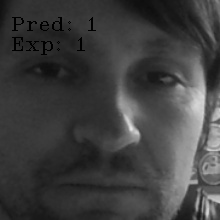

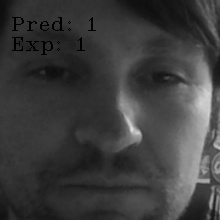

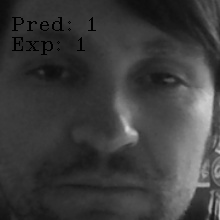

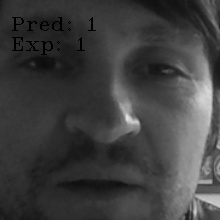

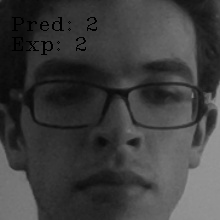

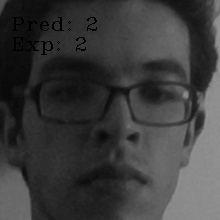

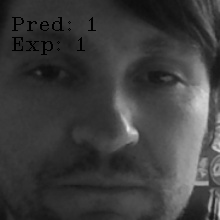

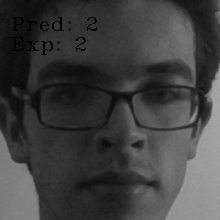

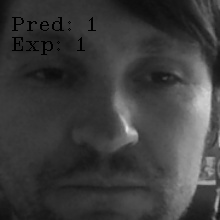

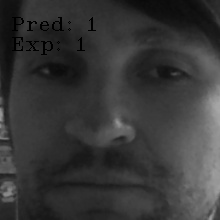

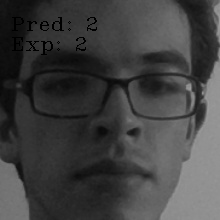

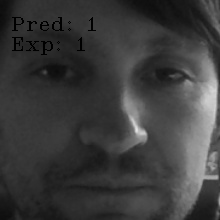

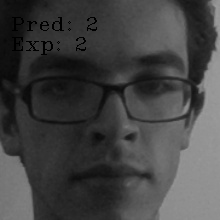

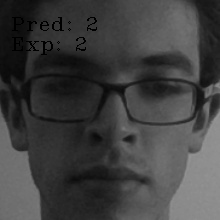

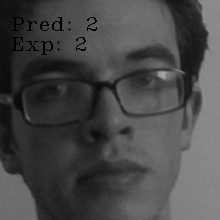

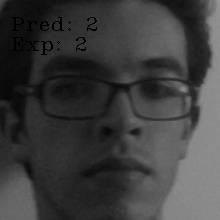

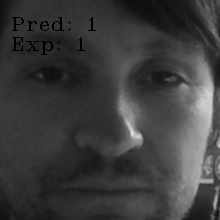

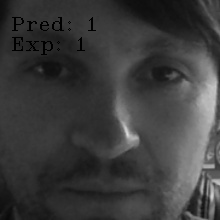

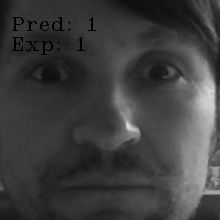

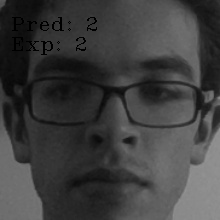

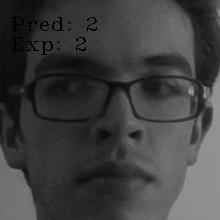

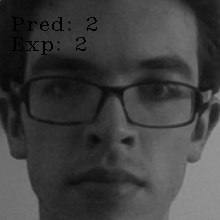

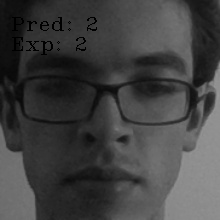

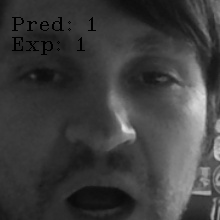

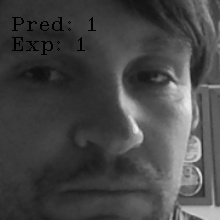

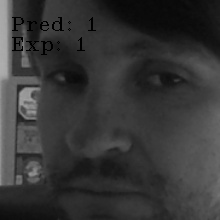

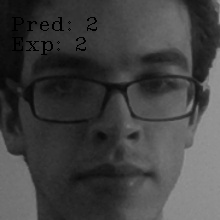

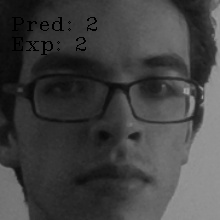

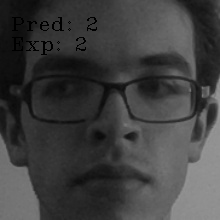

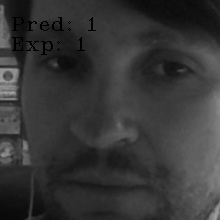

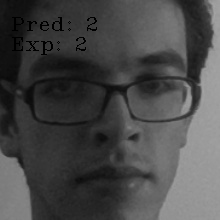

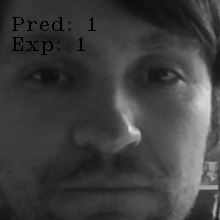

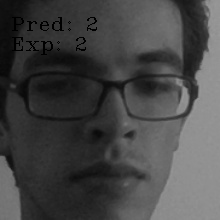

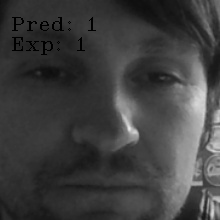

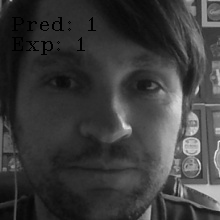

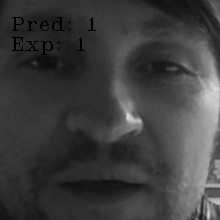

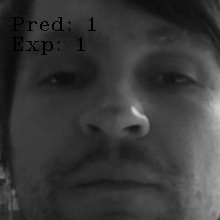

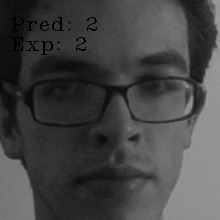

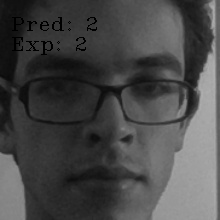

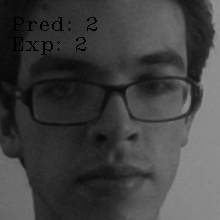

In [61]:
paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2_imshow(image_np)